# Project: 30_days_of_ML_Competition

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ready">Prepare Data For ML</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_colwidth = 250
pd.options.display.max_columns = 50

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [62]:
# loading CSV files in to 3 Dataframes  //df, df_test and sub//

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [63]:
#checking 5 rows sample from Dataframes

df.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [64]:
df_test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,0,0,5,1,1,2,2,0,1,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,0,2,1,3,0,0,0,2,0,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,1,1,3,2,2,4,1,0,3,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,2,1,5,0,3,3,1,4,2,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,0,0,3,0,1,2,0,2,2,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [65]:
sub.head()

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


### Assessing Data

In [66]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [67]:
df_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

In [68]:
#checking Dataframe shape (number of rows and columns)
df.shape, df_test.shape

((900000, 33), (700000, 32))

In [69]:
#checking more information and descriptive statistics

df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,2.177637,1.803392,2.842373,2.239778,1.514686,2.101132,2.096713,1.858518,2.065131,0.308713,-0.178730,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,1.645953,1.537487,1.762835,1.538426,1.359213,1.569093,1.560169,1.467675,1.564783,2.316026,2.400494,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.280941,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.236061,-1.804612,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.330249,-0.190571,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.880517,1.444508,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,14.000000,13.000000,16.000000,12.000000,14.000000,14.000000,15.000000,14.000000,13.000000,12.079667,11.475325,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [70]:
df.describe(include="O")

,f_27
count,900000
unique,741354
top,BBBBBBCJBC
freq,12


In [71]:
df_test.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,7.000000e+05,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,1.250000e+06,-0.000087,-0.000732,-0.000385,0.000705,0.000800,-0.000468,0.002550,2.030819,2.056923,2.361191,2.177039,1.805657,2.842740,2.238527,1.515723,2.100389,2.093906,1.858311,2.068114,0.307276,-0.173972,-0.153938,-0.005623,-0.371983,-0.340683,0.174245,0.356288,0.604213,0.346090,1.003081
std,2.020727e+05,1.000264,0.997131,1.000317,1.001758,0.999088,1.000249,0.999536,1.655909,1.591726,1.636695,1.645091,1.538799,1.760832,1.536974,1.362391,1.569004,1.560600,1.468490,1.564251,2.314931,2.397938,2.484198,2.450907,2.452619,2.388938,2.417555,2.477713,238.888993,0.475723,0.819673
min,9.000000e+05,-4.658018,-4.922718,-4.457561,-4.567419,-4.675301,-5.141356,-4.782164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.419021,-11.089910,-12.186778,-11.700814,-12.104478,-11.838417,-13.312784,-13.462486,-1204.243716,0.000000,0.000000
25%,1.075000e+06,-0.675708,-0.674040,-0.675961,-0.674561,-0.674696,-0.674444,-0.671481,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.237384,-1.794757,-1.816739,-1.641035,-2.021342,-1.948923,-1.443815,-1.263991,-158.660917,0.000000,0.000000
50%,1.250000e+06,-0.000395,-0.000241,-0.000723,-0.000294,0.000276,-0.001674,0.002623,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.326496,-0.184945,-0.149100,0.033726,-0.396281,-0.339431,0.165229,0.399981,0.671386,0.000000,1.000000
75%,1.424999e+06,0.675788,0.671415,0.673105,0.676376,0.674542,0.674146,0.676590,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.874264,1.447103,1.508052,1.664146,1.251361,1.269879,1.794429,2.025163,159.789006,1.000000,2.000000
max,1.599999e+06,5.761950,4.768073,4.599902,4.899904,4.494312,4.701004,4.673145,16.000000,13.000000,16.000000,15.000000,14.000000,15.000000,13.000000,12.000000,14.000000,13.000000,13.000000,13.000000,11.780426,10.691366,11.999494,10.991597,11.366652,10.236546,11.294340,12.811976,1141.957328,1.000000,2.000000


In [72]:
df_test.describe(include="O")

,f_27
count,700000
unique,598482
top,BCBCBBCTBC
freq,9


In [73]:
# checking for NaN values patients

df.isnull().sum().sum(),df_test.isnull().sum().sum() 

(0, 0)

In [74]:
#checking for duplicated rows 

df.duplicated().sum()

0

<a id='clean'></a>

## Data Cleaning

### Reduce memory usage

In [75]:
# Function to reduce memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [76]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 277.23 MB
Memory usage after optimization is: 110.70 MB
Decreased by 60.1%


In [77]:
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 210.29 MB
Memory usage after optimization is: 90.41 MB
Decreased by 57.0%


In [20]:
X = df.drop("target", axis=1).copy()
y = df.target.copy()

### Encode f_27 column

In [79]:
# Check len of charachters in f_27 

(df.f_27.str.len().min(), df.f_27.str.len().max(), df_test.f_27.str.len().min(), df_test.f_27.str.len().min())

(10, 10, 10, 10)

In [80]:
# Encode f_27 
for d_f in [df, df_test]:
    d_f["f_27_uniques"] = d_f.f_27.apply(lambda x : len(set(x)))
    for i in range(10):
        d_f["f_27" + str(i)] = d_f.f_27.apply(lambda x : x.rstrip()[i])
        
df = df.drop(["f_27"], axis=1)
df_test = df_test.drop(["f_27"], axis=1)

In [81]:
# Split columns into ordinal, discrete and continuous

ordinal = ["f_"+str(i) for i in range(270,280)]
discrete =  ["f_0"+str(i) for i in range(7,10)] +["f_"+str(i) for i in range(10,19)] +["f_29","f_30", "f_27_uniques"]
continuous = ["f_0"+str(i) for i in range(0,7)] +["f_"+str(i) for i in range(19,27)] + ["f_28"]

In [83]:
# Check if all columns in df are same on oredinal, cat , count

sorted(ordinal + discrete + continuous + ["id"]) == sorted(df_test.columns.values)

True

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships.


### 1. Continuous Features Plots (Train and Test)

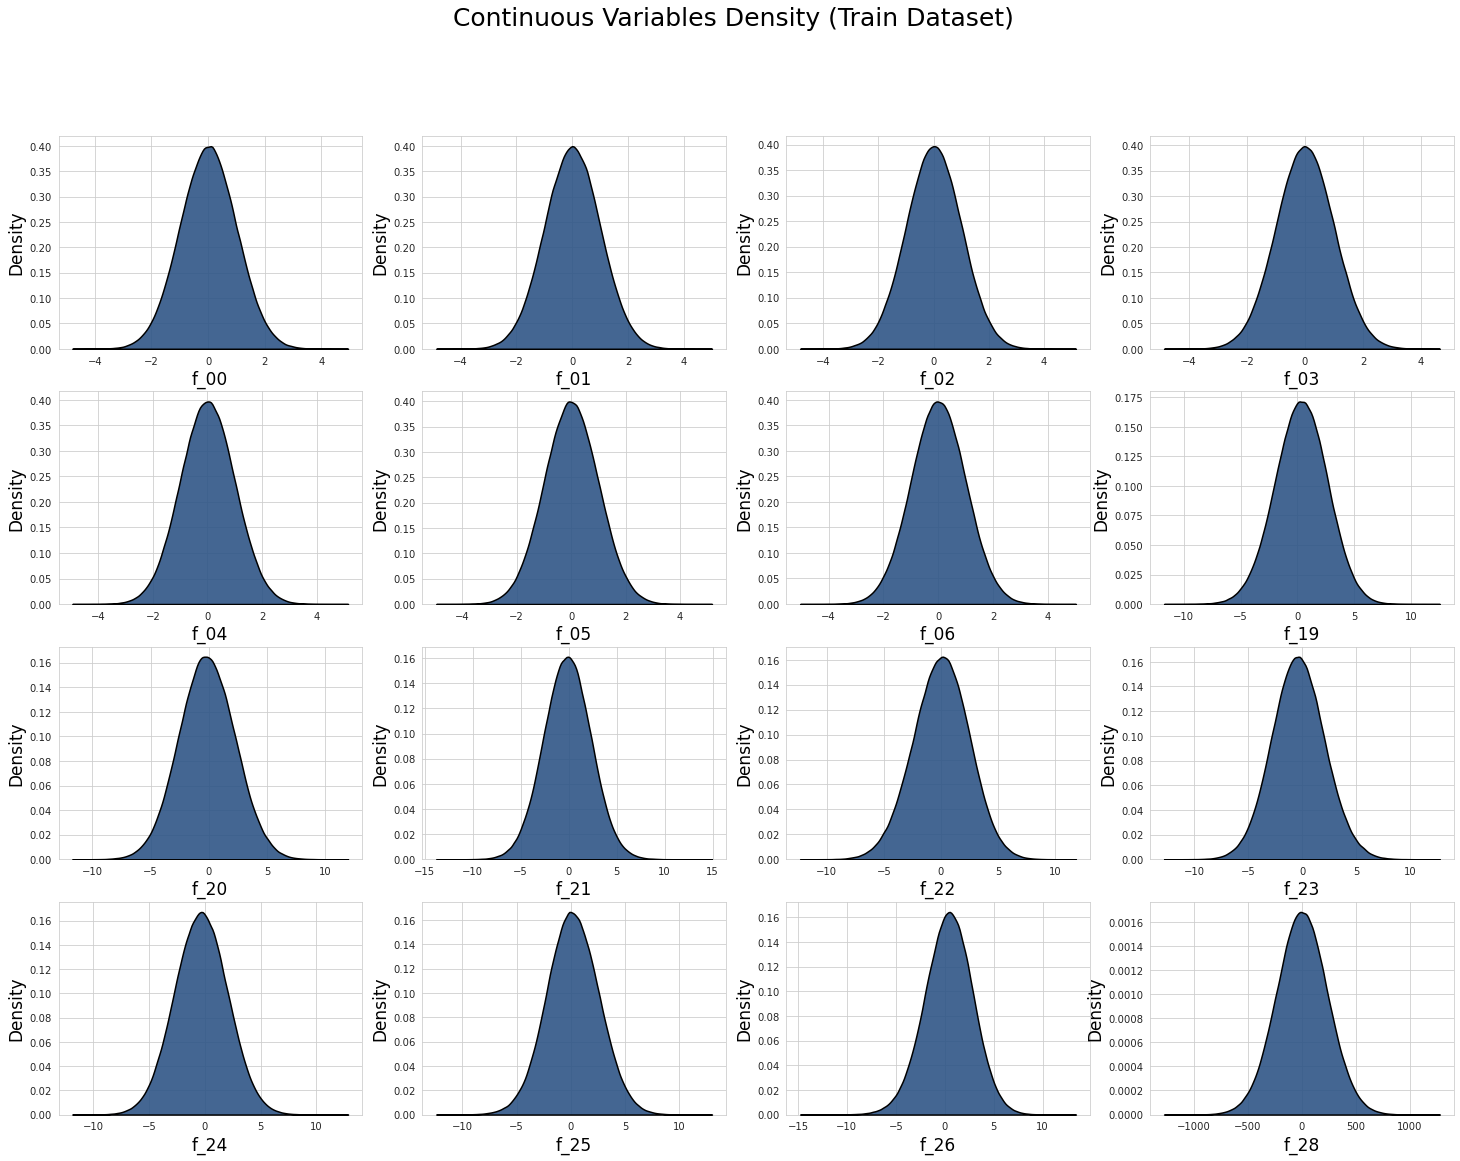

In [84]:
# continuous Variables Density plot

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in continuous:
    sns.kdeplot(df[col], ax=ax[k,j],
                shade=True,
                color='#2f5586', edgecolor='black',
                linewidth=1.5, alpha=0.9,
                zorder=3
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Density", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Continuous Variables Density (Train Dataset)', fontsize=25, color="k");

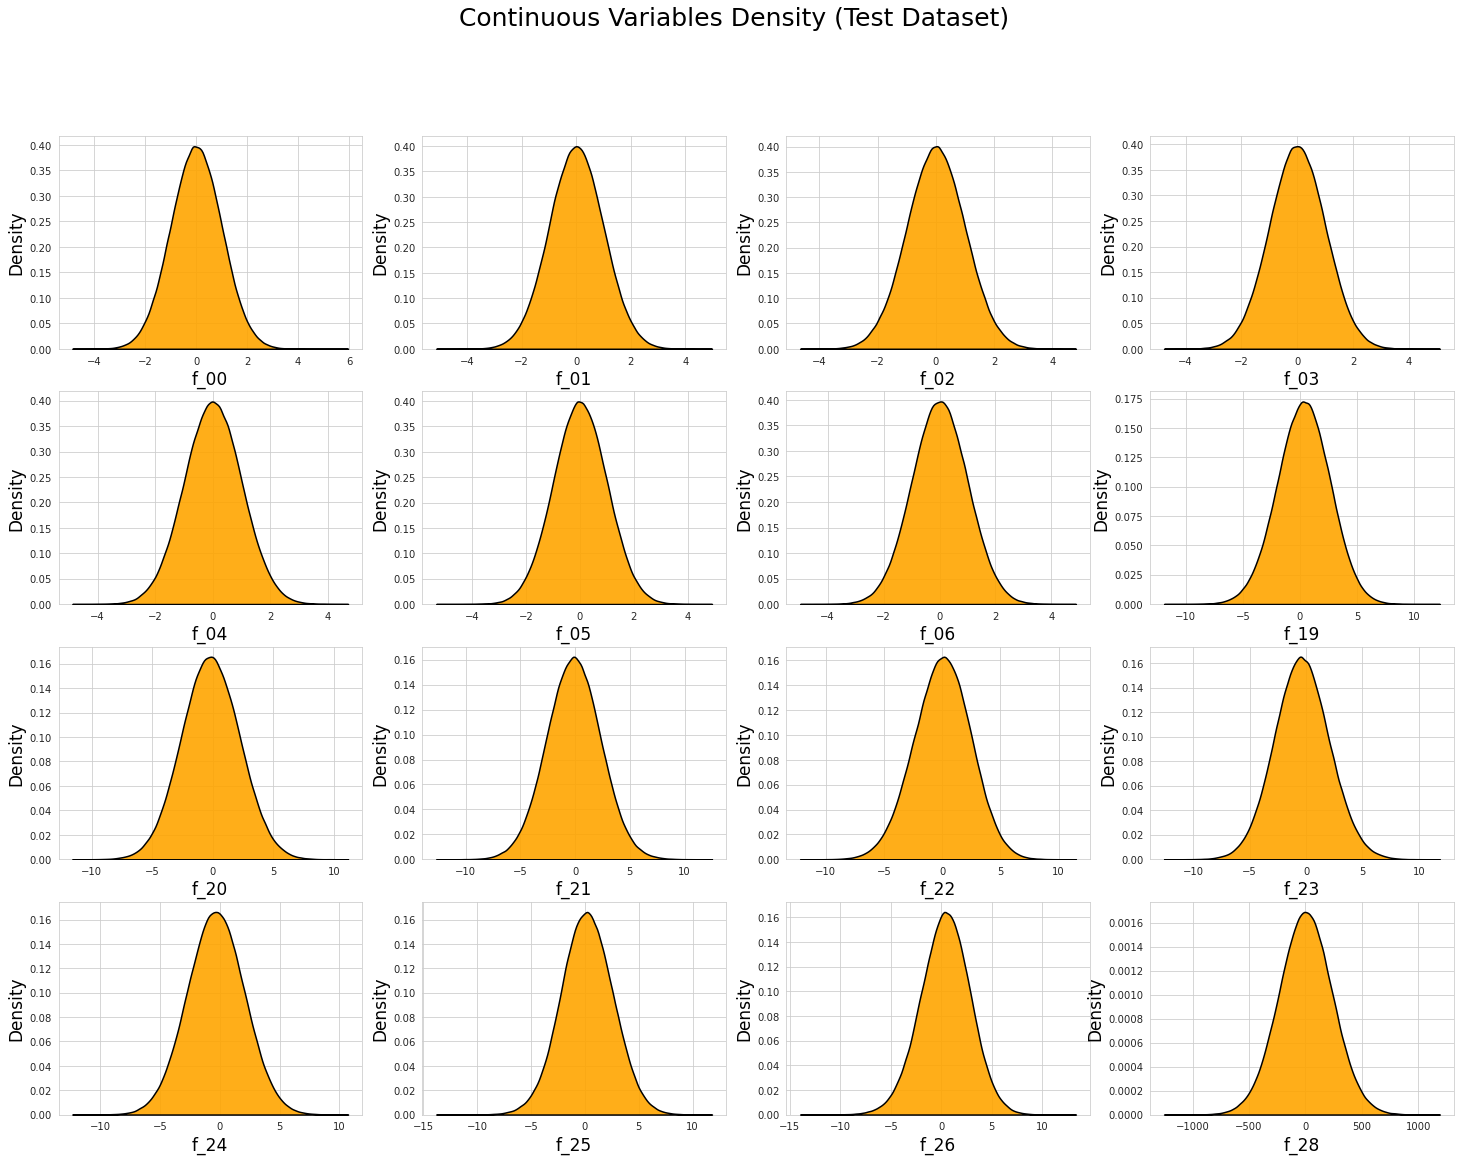

In [85]:
# Quantitative Variables Density plot

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in continuous:
    sns.kdeplot(df_test[col], ax=ax[k,j],
                shade=True,
                color='orange', edgecolor='black',
                linewidth=1.5, alpha=0.9,
                zorder=3
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Density", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Continuous Variables Density (Test Dataset)', fontsize=25, color="k");

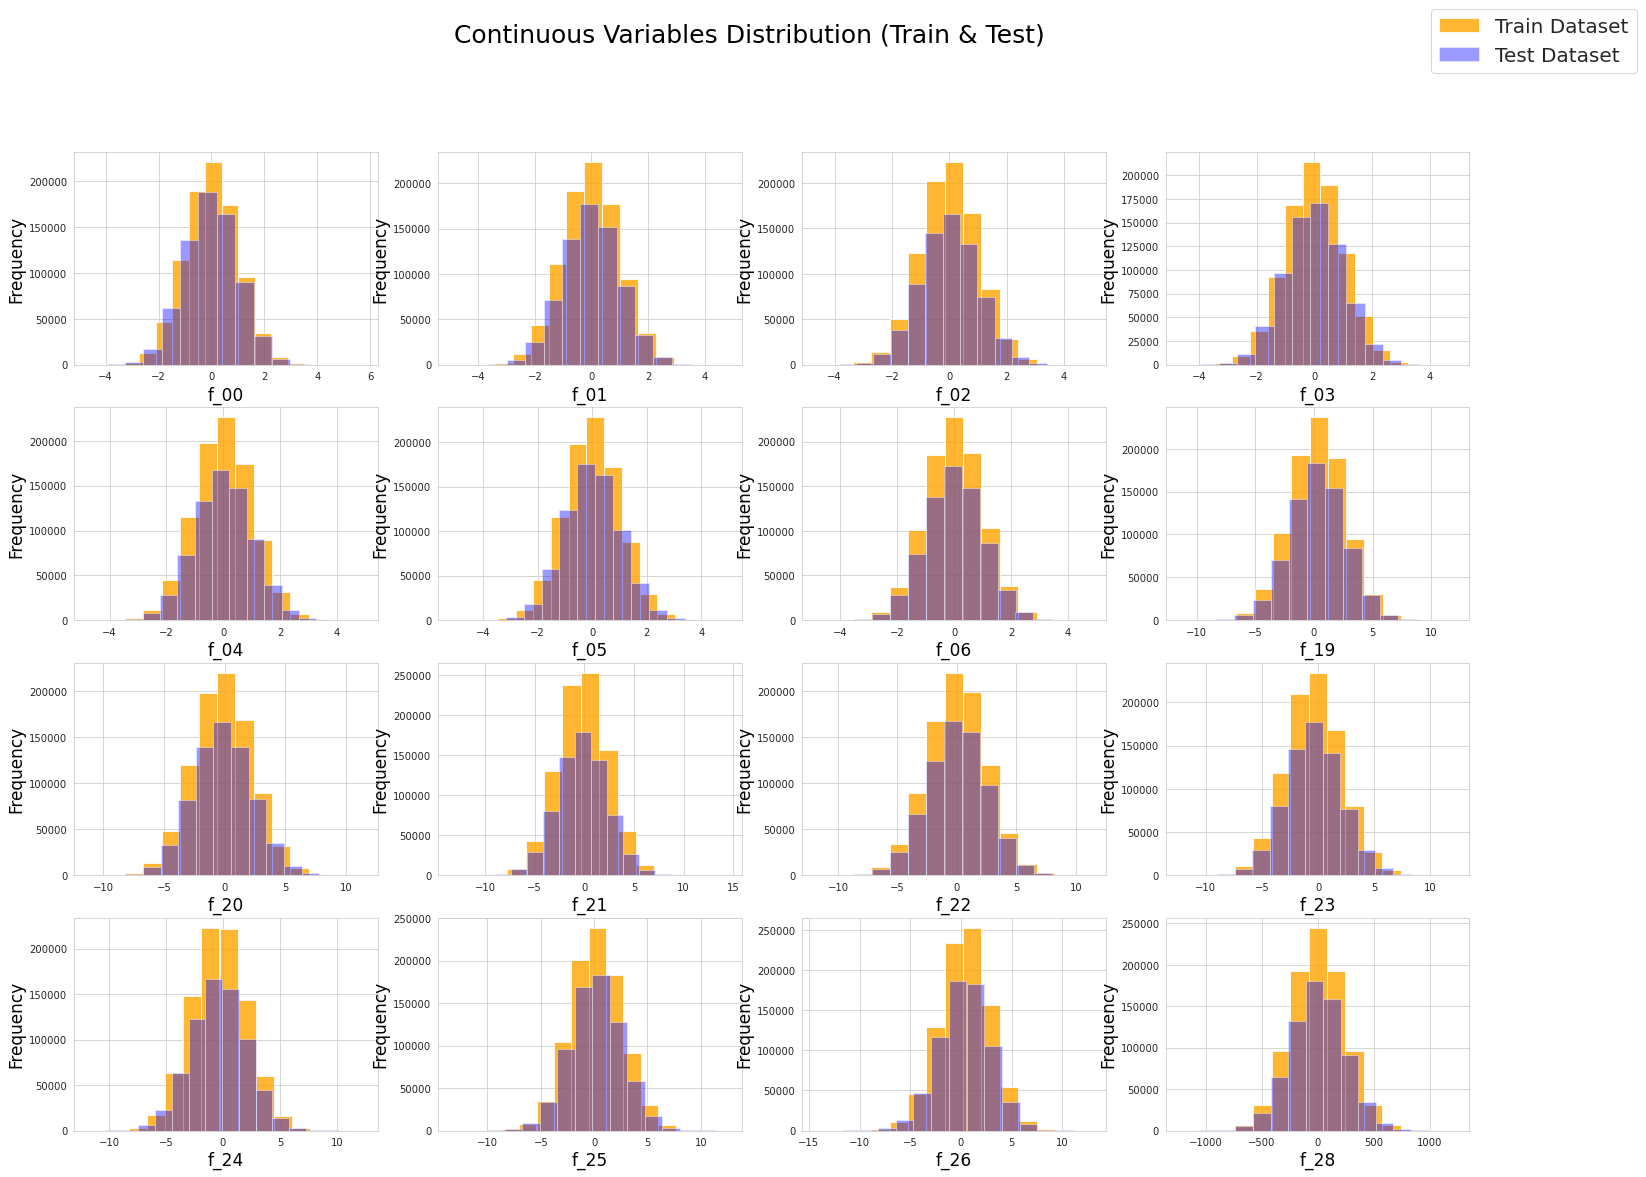

In [86]:
# Continuous Variables Distribution

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in continuous:
    ax[k,j].hist(df[col], label="Train Dataset", alpha=0.8, color="orange", bins=15)
    ax[k,j].hist(df_test[col], label="Test Dataset",alpha=0.4, color="b", bins=15)
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Frequency", fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Continuous Variables Distribution (Train & Test)', fontsize=25, color="k")
fig.legend(["Train Dataset","Test Dataset"], fontsize=20);

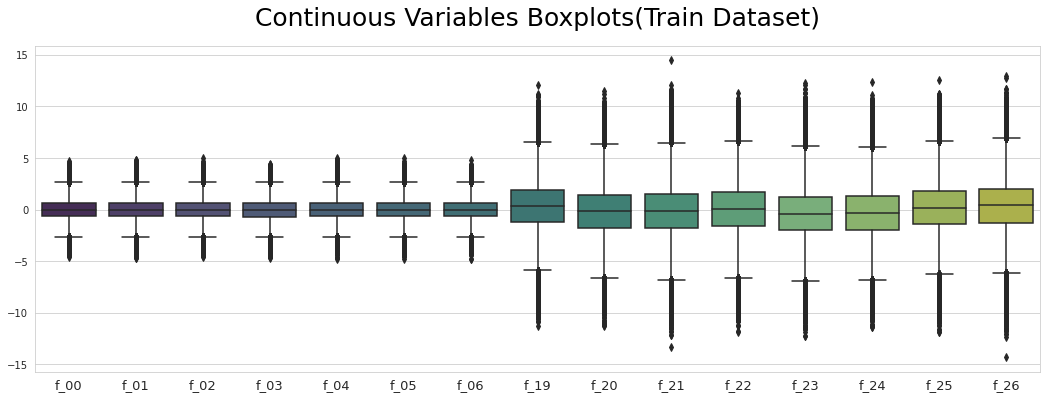

In [87]:
co_box = [i for i in continuous if i not in "f_28"]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[co_box],saturation=.5, palette="viridis")
plt.title("Continuous Variables Boxplots(Train Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

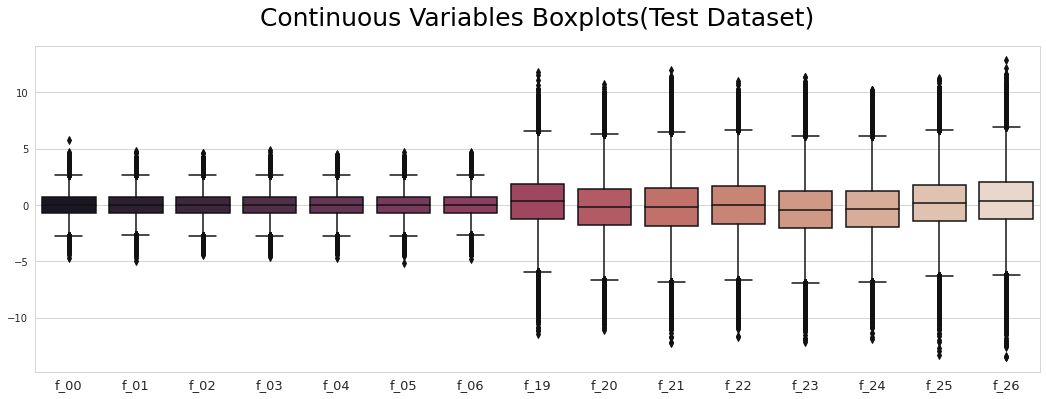

In [88]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df_test[co_box],saturation=.5, palette="rocket")
plt.title("Continuous Variables Boxplots(Test Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

### 2. Discrete Features Plots (Train and Test)

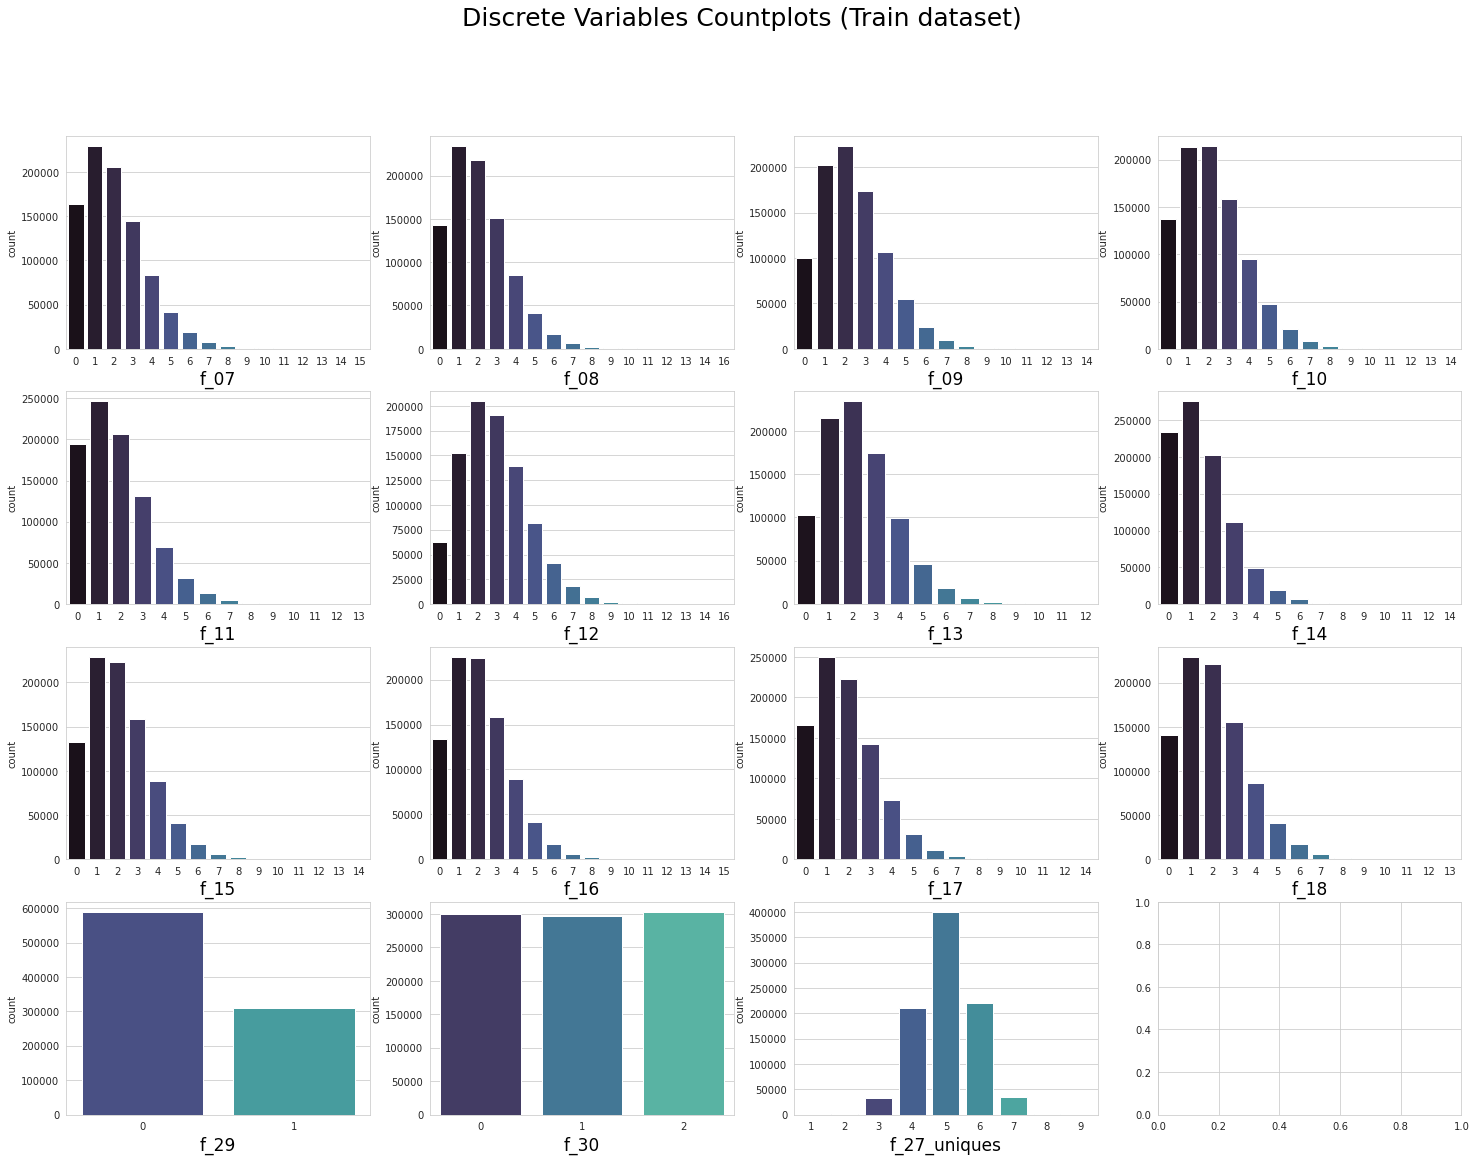

In [89]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in discrete:
    sns.countplot(data = df[discrete], x=col, label="Train Dataset", ax=ax[k,j], palette="mako")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Discrete Variables Countplots (Train dataset)', fontsize=25, color="k");

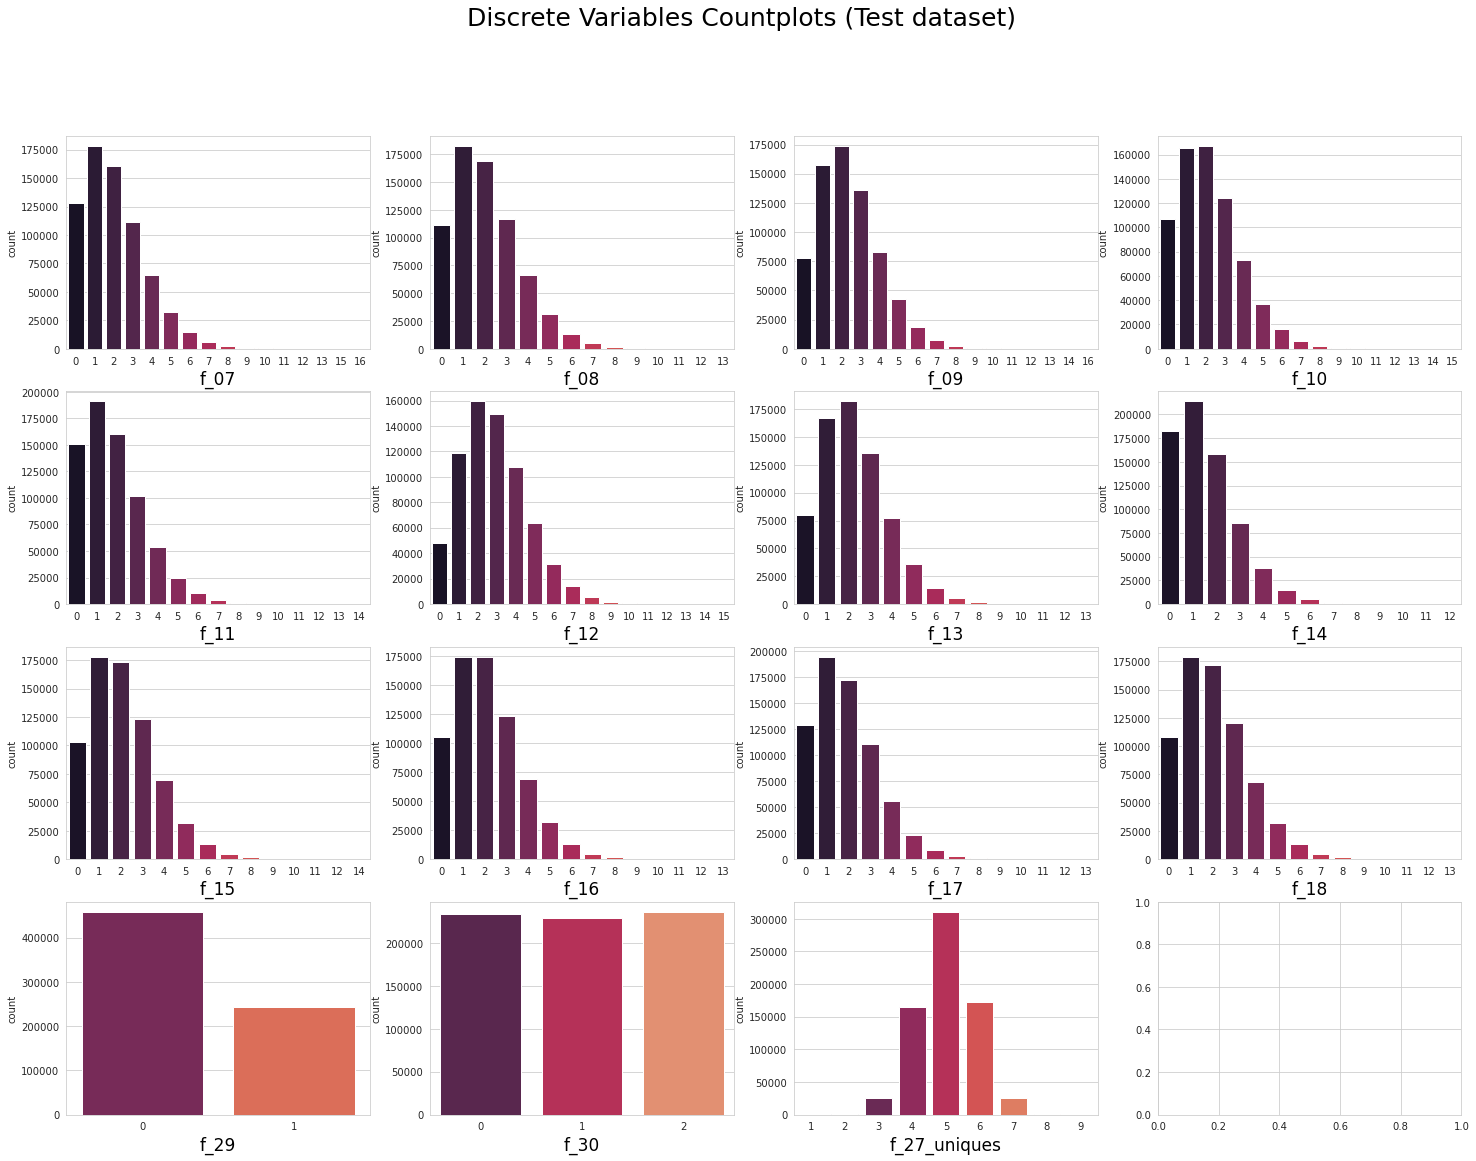

In [90]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(4,4,figsize=(25,18))
k=0
j=0
for col in discrete:
    sns.countplot(data = df_test[discrete], x=col, label="Train Dataset", ax=ax[k,j], palette="rocket")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Discrete Variables Countplots (Test dataset)', fontsize=25, color="k");

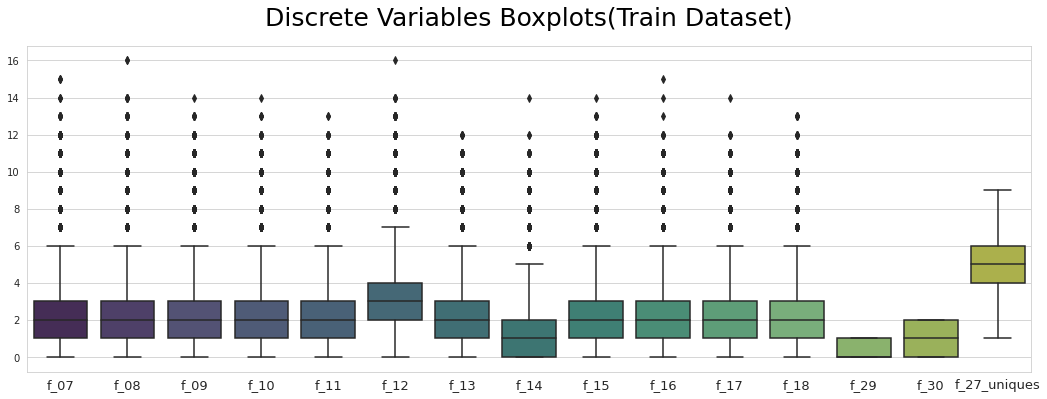

In [91]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df[discrete],saturation=.5, palette="viridis")
plt.title("Discrete Variables Boxplots(Train Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

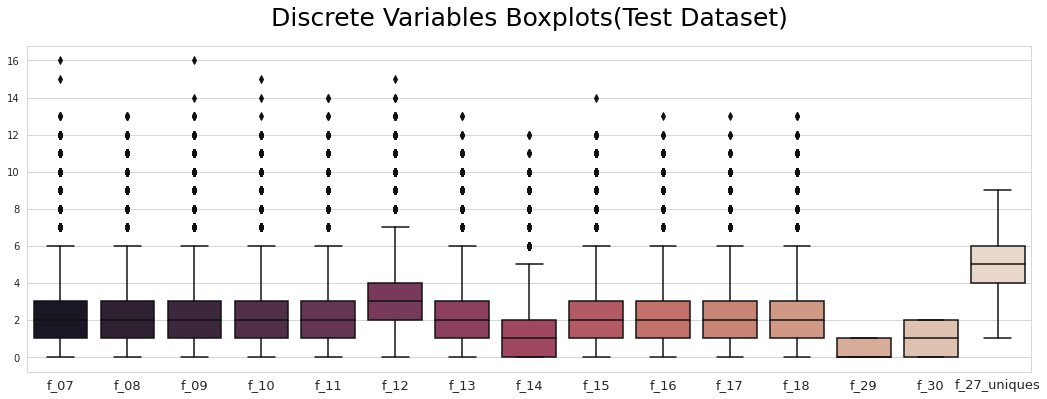

In [92]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df_test[discrete],saturation=.5, palette="rocket")
plt.title("Discrete Variables Boxplots(Test Dataset)", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13);

### 3. Categorical Features Plots (Train and Test)

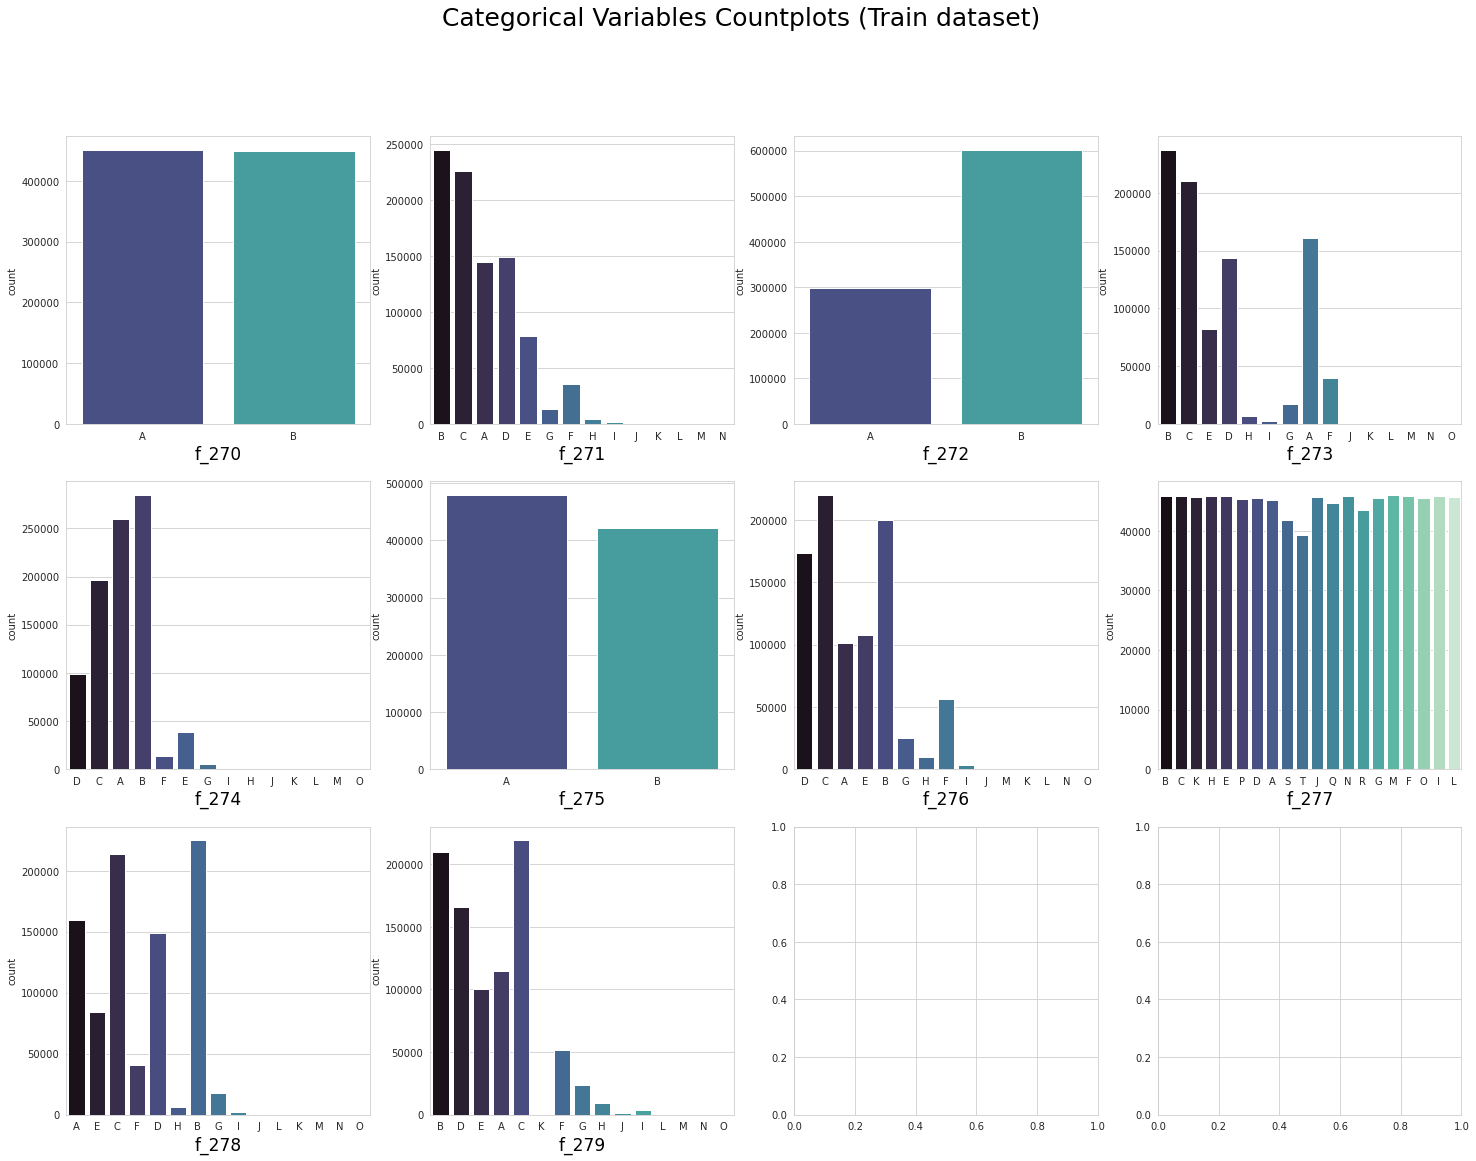

In [93]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(3,4,figsize=(25,18))
k=0
j=0
for col in ordinal:
    sns.countplot(data = df[ordinal], x=col, label="Train Dataset", ax=ax[k,j], palette="mako")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Categorical Variables Countplots (Train dataset)', fontsize=25, color="k");

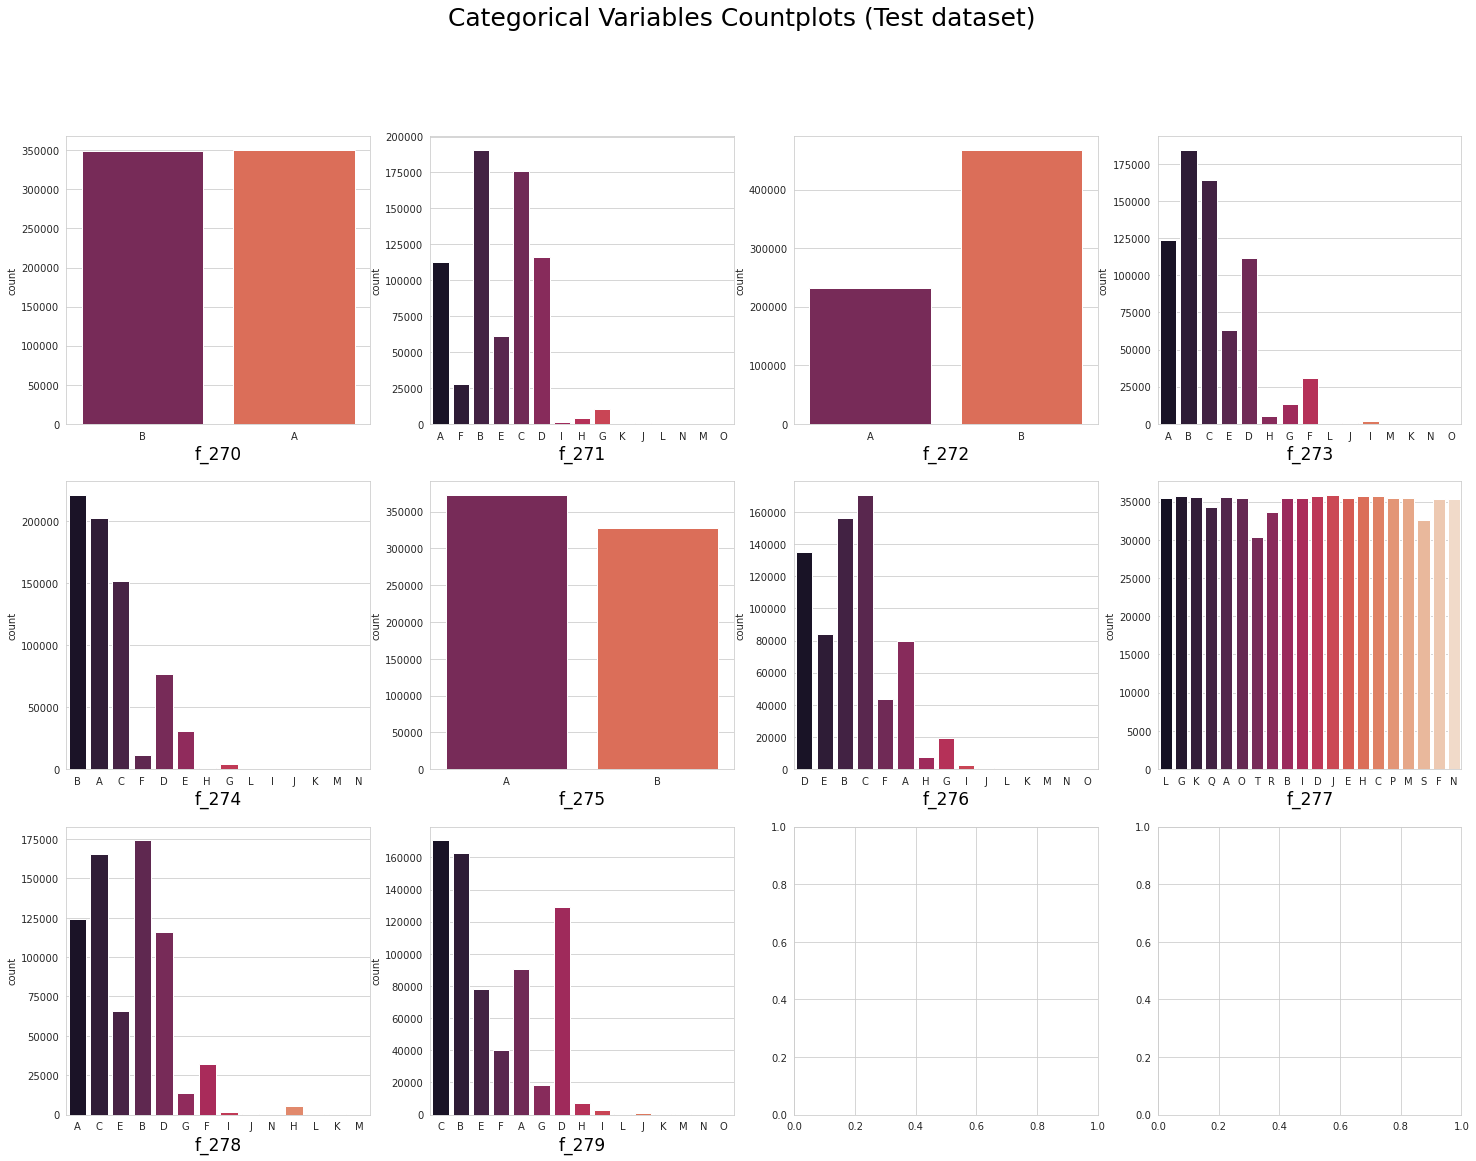

In [94]:
# Categorical Variables Barplots train dataset

fig,ax = plt.subplots(3,4,figsize=(25,18))
k=0
j=0
for col in ordinal:
    sns.countplot(data = df_test[ordinal], x=col, label="Train Dataset", ax=ax[k,j], palette="rocket")
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    #ax[k,j].set_xticklabels(fontsize=11, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
fig.suptitle('Categorical Variables Countplots (Test dataset)', fontsize=25, color="k");

### 4. Heatmap for Train and Test

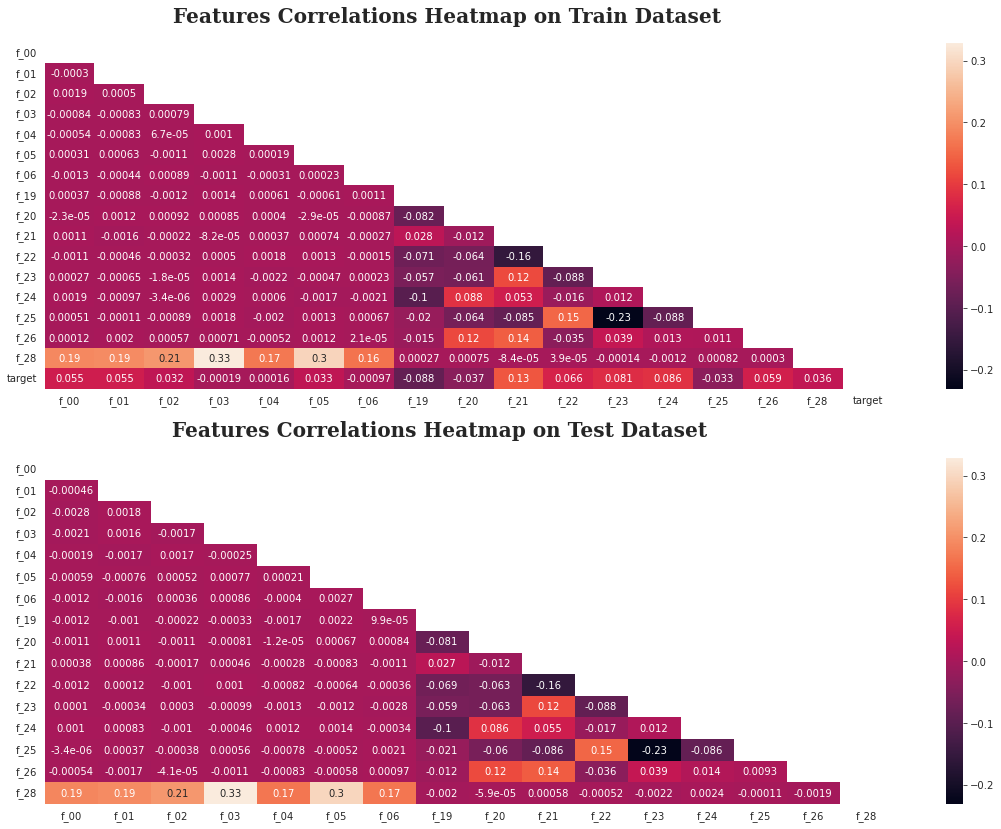

In [95]:
fig,ax = plt.subplots(2,1, figsize=(19,14))
corr_matrix = df[continuous+ ["target"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, ax=ax[0], annot=True, mask=mask)

corr_matrix = df_test[continuous].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, ax=ax[1], annot=True , mask=mask)

#sns.heatmap(df_test[count].corr(),ax=ax[1], annot=True)
ax[1].set_yticklabels(continuous, rotation=0)
ax[0].text(-0.1, -1, '                   Features Correlations Heatmap on Train Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
ax[1].text(-0.1, -1, '                   Features Correlations Heatmap on Test Dataset', fontsize=20, fontweight='bold', fontfamily='serif');

# Observations:

**- There are 16 continuous column.**

**- There are 14 numeric columns with low number of unique values which give indecation that they are categorical features from f_07 to f_18, f_29 and f_30.**

**- There are one Categorical variable f_27 every cell has 10 characters and I split them into 10 separate columns each column has one character from f_270 to f_97**

**- There is no missing values in both train and test datasets**

**- There is no duplicated values**



<a id='ready'></a>

#  Preparing Data for ML model

In [96]:
# use onehot encoding on categorical variables

ordinal_encoder = OrdinalEncoder()
X_oridinal = df[ordinal].copy()
test_oridinal = df_test[ordinal].copy()

X_oridinal[ordinal] = pd.DataFrame(ordinal_encoder.fit_transform(X_oridinal[ordinal]))
test_oridinal[ordinal] = pd.DataFrame(ordinal_encoder.fit_transform(test_oridinal[ordinal]))

X = pd.concat([df[continuous], X_oridinal ,df[discrete]], axis=1)
test =  pd.concat([df_test[continuous], test_oridinal,df_test[discrete]], axis=1)
y = df.target
sorted(list(X.columns)) == sorted(list(test.columns))

True

### Now we have 3 dataframes (X, y and test)

In [97]:
# Import Models for ML 

from sklearn.model_selection import train_test_split
import lightgbm as lgb
import optuna
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score

## Bulding First ML Model

In [98]:
# Set Random_state to 1

random_state=1


# Split data into train and test datasets

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = random_state, test_size=0.25)

In [99]:
%%time

# Bulid first model



clf = lgb.LGBMClassifier()
clf.fit(train_X, train_y)
preds = clf.predict(test_X)
roc_score = roc_auc_score(test_y, preds)
print("roc_score: %.2f%%" % (roc_score * 100.0))

roc_score: 88.92%
CPU times: user 58.7 s, sys: 1.56 s, total: 1min
Wall time: 16.7 s


In [103]:
%%time
# Bulid model with cross validation and check overfitting and underfitting

clf = lgb.LGBMClassifier()
clf.fit(train_X, train_y)
preds = clf.predict(test_X)

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_trian_scores = cross_val_score(clf, train_X, train_y,  cv=kf, scoring="roc_auc")
cv_test_scores = cross_val_score(clf, test_X, test_y,  cv=kf, scoring="roc_auc")

print("test_score: {} train_score: {}".format(cv_test_scores.mean(), cv_trian_scores.mean()))

test_score: 0.9543957798455374 train_score: 0.9556613567516518
CPU times: user 7min 55s, sys: 10 s, total: 8min 5s
Wall time: 2min 7s


## Hyperparameters Tuning using optuna

In [279]:
from lightgbm import early_stopping
from lightgbm import log_evaluation
def objective(trial,data=X,target=y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=random_state)
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        #'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001 , 1),
        'n_estimators':trial.suggest_int('n_estimators',100,10000, 10),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    
    model = lgb.LGBMClassifier(**param)  
    callbacks = [lgb.early_stopping(10, verbose=0)]#, lgb.log_evaluation(period=0)]
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)], early_stopping_rounds=100,verbose=False)
    preds = model.predict(X_test)
    #predictions = [round(value) for value in preds]
    roc_score = roc_auc_score(y_test, preds)
    return roc_score

In [ ]:
%%time

import warnings
warnings.filterwarnings('ignore')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best Score:', study.best_trial.value)

[I 2022-07-24 20:55:51,628] A new study created in memory with name: no-name-f92bf177-a53e-4864-a500-85dffc230e11
[I 2022-07-24 20:55:59,792] Trial 0 finished with value: 0.8356216572164162 and parameters: {'alpha': 0.16160503424182318, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.04168893696481758, 'n_estimators': 180, 'max_depth': 7, 'min_child_weight': 158}. Best is trial 0 with value: 0.8356216572164162.
[I 2022-07-24 20:59:46,701] Trial 1 finished with value: 0.9123217986975719 and parameters: {'alpha': 0.5364200564132405, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.2032282415847994, 'n_estimators': 6470, 'max_depth': 5, 'min_child_weight': 150}. Best is trial 1 with value: 0.9123217986975719.
[I 2022-07-24 21:09:42,257] Trial 2 finished with value: 0.8650347645183287 and parameters: {'alpha': 1.5734037537287437, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.0017779575781039475, 'n_estimators': 6040, 'max_depth': 13, 'min_child_we

[I 2022-07-24 22:36:07,511] Trial 25 finished with value: 0.916548264255363 and parameters: {'alpha': 4.185590024762539, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.5340001237844972, 'n_estimators': 1350, 'max_depth': 13, 'min_child_weight': 5}. Best is trial 24 with value: 0.9258077574359526.
[I 2022-07-24 22:43:31,624] Trial 26 finished with value: 0.9262905750154513 and parameters: {'alpha': 1.7521398595828492, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.0716383841505433, 'n_estimators': 7540, 'max_depth': 13, 'min_child_weight': 31}. Best is trial 26 with value: 0.9262905750154513.
[I 2022-07-24 22:51:22,793] Trial 27 finished with value: 0.9242798195472608 and parameters: {'alpha': 2.2901208627150638, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.06847173902220488, 'n_estimators': 7320, 'max_depth': 13, 'min_child_weight': 64}. Best is trial 26 with value: 0.9262905750154513.
[I 2022-07-24 23:01:07,283] Trial 28 finished with val

[I 2022-07-25 00:47:43,690] Trial 50 finished with value: 0.9176628236172784 and parameters: {'alpha': 0.29559654762388743, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.10079377986242692, 'n_estimators': 9500, 'max_depth': 7, 'min_child_weight': 170}. Best is trial 33 with value: 0.9268807189959937.
[I 2022-07-25 00:52:44,397] Trial 51 finished with value: 0.9259293365648161 and parameters: {'alpha': 2.997491087130962, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.050338445358115595, 'n_estimators': 8840, 'max_depth': 13, 'min_child_weight': 26}. Best is trial 33 with value: 0.9268807189959937.
[I 2022-07-25 00:53:36,799] Trial 52 finished with value: 0.9046944187875575 and parameters: {'alpha': 1.339247380320179, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.05588262860235007, 'n_estimators': 1260, 'max_depth': 13, 'min_child_weight': 4}. Best is trial 33 with value: 0.9268807189959937.
[I 2022-07-25 01:00:50,814] Trial 53 finished with

[I 2022-07-25 02:27:31,082] Trial 75 finished with value: 0.9209517067845175 and parameters: {'alpha': 4.440222263935911, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.4047836021728042, 'n_estimators': 9940, 'max_depth': 11, 'min_child_weight': 2}. Best is trial 69 with value: 0.9300459118119959.
[I 2022-07-25 02:27:56,447] Trial 76 finished with value: 0.9116393045525965 and parameters: {'alpha': 2.3430660222505897, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.6036571652551356, 'n_estimators': 9480, 'max_depth': 11, 'min_child_weight': 12}. Best is trial 69 with value: 0.9300459118119959.
[I 2022-07-25 02:30:10,459] Trial 77 finished with value: 0.9276193344922599 and parameters: {'alpha': 4.909170633014386, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.1765225351071657, 'n_estimators': 9210, 'max_depth': 11, 'min_child_weight': 1}. Best is trial 69 with value: 0.9300459118119959.
[I 2022-07-25 02:32:33,620] Trial 78 finished with value

In [ ]:
best_params = study.best_params

# Model After Tuning

In [31]:
%%time

#b =  {'learning_rate': 0.11094580978935166, 'n_estimators': 9950}

clf = lgb.LGBMClassifier(random_state=random_state, **best_params)
clf.fit(train_X, train_y)
preds = clf.predict(test_X)
roc_score = roc_auc_score(test_y, preds)


preds_train = clf.predict(train_X)
roc_score_train = roc_auc_score(train_y, preds_train)
print("test_score: {} train_score: {}".format(roc_score, roc_score_train))

test_score: 0.9563126872617208 train_score: 0.9993043997051947
CPU times: user 1h 23min 58s, sys: 1min 7s, total: 1h 25min 5s
Wall time: 21min 29s


### Final Model

In [102]:
%%time

#b = {'learning_rate': 0.11094580978935166, 'n_estimators': 9950}

final_clf = lgb.LGBMRegressor(**best_params,
                        random_state=random_state,
                        n_jobs=-1
                       )
final_clf.fit(X, y)
final_preds = clf.predict(test)

CPU times: user 1h 14min 12s, sys: 1min 37s, total: 1h 15min 49s
Wall time: 19min 19s


### Save prediction to submission file

In [58]:
# Save test predictions to file

output = pd.DataFrame({'Id': df_test.id,
                       'target': final_preds})
output.to_csv('submission_may.csv', index=False)